In [19]:
#`````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````#
# Homework 5 - MatPlotLib - Option2: Pymaceuticals                                                                            #
#`````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````#

In [20]:
#`````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````#
# Get Set up                                                                                                                  #
#`````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````#

# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Get sem from scipy since we need to find means and standard errors
from scipy.stats import sem

# Read in the CSV files and put them into DataFrames
druggedms_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_data = pd.read_csv("data/clinicaltrial_data.csv")

# Preview the Mouse Drug CSV
druggedms_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [21]:
# Preview the Clinical Trial CSV
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [22]:
# Now, merge the Dataframes at 'Mouse ID' to view everything together
letsmerge_df = pd.merge(clinical_data, druggedms_data, on=("Mouse ID") , how = 'outer')
letsmerge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [23]:
#`````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````#
# Get the data to review and plot the Tumor Response to Treatment Data                                                        #                                                                                      #
#`````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````#

# First, get the columns you need and put them into a DataFrame (Drug, Timepoint, and Tumor Volume)
trtt_df = letsmerge_df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]

# Now that you have the columns, it's time to calculate the mean
trtt_df = pd.DataFrame(trtt_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean())

# Next, calculate the the standard error
trtt_df["Volume SEM"] = trtt_df["Tumor Volume (mm3)"].sem()
trtt_df.reset_index(inplace = True)

# Now, take a look at the DataFrame with the mean and standard error
trtt_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Volume SEM
0,Capomulin,0,45.000000,0.898067
1,Capomulin,5,44.266086,0.898067
2,Capomulin,10,43.084291,0.898067
3,Capomulin,15,42.064317,0.898067
4,Capomulin,20,40.716325,0.898067


In [24]:
# Now, we will use Minor Data Munging to Re-Format the Data Frames with our old pal, the Pivot Table

# First, pivot the Tumor Response Data
trtt_pivot = trtt_df.pivot_table(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")  

# Preview and make sure the re-formatting worked
trtt_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [25]:
# Next, pivot the Tumor Response Data with only standard error. This is going to help properly plot your chart. 
sem_pivot = trtt_df.pivot_table(index="Timepoint",columns="Drug",values="Volume SEM")

# Preview and make sure the re-formatting worked
sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
5,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
10,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
15,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
20,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067


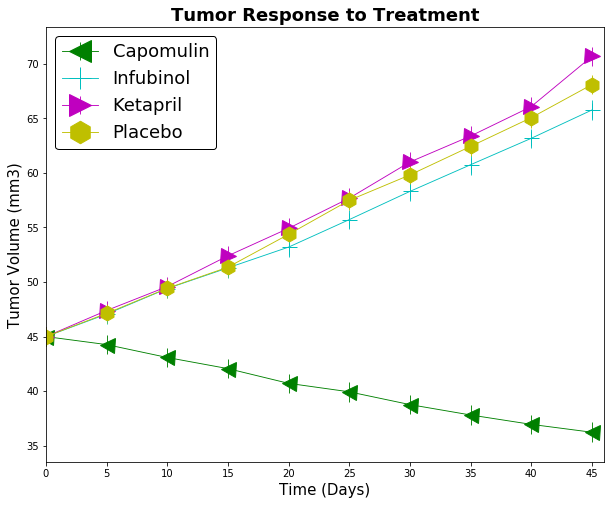

In [27]:
# Create a scatter plot (with Error Bars) showing the tumor volume change over time for each treatment

# Make the Plot nice
plt.figure(figsize = (10,8))
plt.title('Tumor Response to Treatment', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Time (Days)', fontdict = {'fontsize': 15})
plt.ylabel('Tumor Volume (mm3)', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0, trtt_pivot.index.max()+3 , 5)) 
plt.xlim(0, trtt_pivot.index.max() + 1) 

# Errorbar for 'Capmulin'
plt.errorbar(trtt_pivot.index, trtt_pivot["Capomulin"], yerr=sem_pivot["Capomulin"],
             color='g', marker='<', markersize=15, linestyle='-', linewidth=0.88)

# Errorbar for 'Infubinol'
plt.errorbar(trtt_pivot.index, trtt_pivot["Infubinol"], yerr=sem_pivot["Infubinol"],
             color='c', marker='+', markersize=15, linestyle='-', linewidth=0.88)

# Errorbar for 'Ketapril'
plt.errorbar(trtt_pivot.index, trtt_pivot["Ketapril"], yerr=sem_pivot["Ketapril"],
             color='m', marker='>', markersize=15, linestyle='-', linewidth=0.88)

# Errorbar for 'Placebo'
plt.errorbar(trtt_pivot.index, trtt_pivot["Placebo"], yerr=sem_pivot["Placebo"],
             color='y', marker='h', markersize=15, linestyle='-', linewidth=0.88)

# Plot the Legend and make it nice
tumleg = plt.legend(numpoints = 1, 
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'k', 
                fontsize = '18', 
                framealpha = 1)

# View the Tumor Scatter 
plt.show()

## Metastatic Response to Treatment

In [9]:
#`````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````#
# Get the data to review and plot the Metastatic Response to Treatment Data                                                   #                                          #                                                                                      #
#`````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````#

# Repeating the steps from above, get the columns you need and put them into a DataFrame (Drug, Timepoint, and Metastatic)
meta_df = letsmerge_df[["Drug", "Timepoint", "Metastatic Sites"]]
meta_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0
1,Capomulin,5,0
2,Capomulin,10,0
3,Capomulin,15,0
4,Capomulin,20,0


In [10]:
# Calculate the mean
meta_df = pd.DataFrame(meta_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean())

# Caluclate the standard error
meta_df["Metastatic Site SEM"] = meta_df["Metastatic Sites"].sem()
meta_df.reset_index(inplace = True)

# Peep the DataFrame with the mean and standard error
meta_df.head()

,Drug,Timepoint,Metastatic Sites,Metastatic Site SEM
0,Capomulin,0,0.000000,0.090044
1,Capomulin,5,0.160000,0.090044
2,Capomulin,10,0.320000,0.090044
3,Capomulin,15,0.375000,0.090044
4,Capomulin,20,0.652174,0.090044


In [11]:
# Same as before - use Minor Data Munging to Re-Format the Data Frames with Pivot Tables

# Meta Data
meta_pivot = meta_df.pivot_table(index="Timepoint",columns="Drug",values="Metastatic Sites")  

# Preview and make sure the re-formatting worked
meta_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
# Standard Error Data
semeta_pivot = meta_df.pivot_table(index="Timepoint",columns="Drug",values="Metastatic Site SEM") 

# Preview and make sure the re-formatting worked
semeta_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
5,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
10,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
15,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
20,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
25,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
30,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
35,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
40,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044


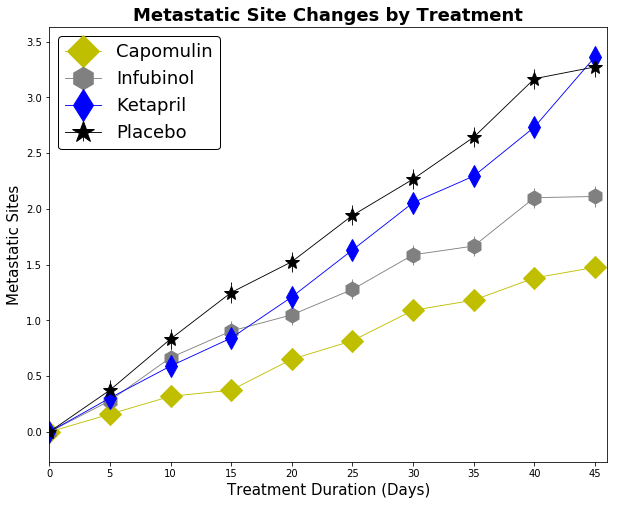

In [28]:
# Create a scatter plot (with Error Bars) showing how the number of metastatic sites change over time for each treatment.

# Repeat: Make the Plot nice
plt.figure(figsize = (10,8))
plt.title('Metastatic Site Changes by Treatment', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Treatment Duration (Days)', fontdict = {'fontsize': 15})
plt.ylabel('Metastatic Sites', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0, trtt_pivot.index.max()+3 , 5)) 
plt.xlim(0, trtt_pivot.index.max() + 1) 

# Errorbar for 'Capomulin'
plt.errorbar(meta_pivot.index, meta_pivot["Capomulin"], yerr=semeta_pivot["Capomulin"],
             color='y', marker='D', markersize=15, linestyle='-', linewidth=0.88)

# Errorbar for 'Infubinol'
plt.errorbar(meta_pivot.index, meta_pivot["Infubinol"], yerr=semeta_pivot["Infubinol"],
             color='gray', marker='h', markersize=15, linestyle='-', linewidth=0.88)

# Errorbar for 'Ketapril'
plt.errorbar(meta_pivot.index, meta_pivot["Ketapril"], yerr=semeta_pivot["Ketapril"],
             color='b', marker='d', markersize=15, linestyle='-', linewidth=0.88)

# Errorbar for 'Placebo'
plt.errorbar(meta_pivot.index, meta_pivot["Placebo"], yerr=semeta_pivot["Placebo"],
             color='k', marker='*', markersize=15, linestyle='-', linewidth=0.88)


# Repeat: Plot the Legend and make it nice
metleg = plt.legend(numpoints = 1, 
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'k', 
                fontsize = '18', 
                framealpha = 1)


# Let's see the Meta Scatter
plt.show()

## Survival Rates

In [14]:
#`````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````#
# Get the data to review and plot the Survival Rate Data                                                                      #                                          #                                                                                      #
#`````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````#

# Get the columns and DataFrame it up () you need and put them into a DataFrame (Drug, Timepoint, and Mouse ID)
survival_df = letsmerge_df[['Drug', 'Timepoint', 'Mouse ID']]

# Since we want to look at survival rates, set the index to Drug and Timepoint
survival_df = survival_df.set_index(['Drug', 'Timepoint'])

# Check it out
survival_df.head()

Mouse ID
Drug      Timepoint         
Capomulin 0             b128
          5             b128
          10            b128
          15            b128
          20            b128

In [15]:
# Rinse and Repeat the with Pivoting

# First, get the mouse count 
survival_df['Mouse Count'] = survival_df.groupby(['Drug','Timepoint']).count()['Mouse ID']

# Let's pivot
survival_pivot = survival_df.pivot_table(index='Timepoint',columns='Drug',values='Mouse Count')  

# Check out the rate of surviving mice
survival_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


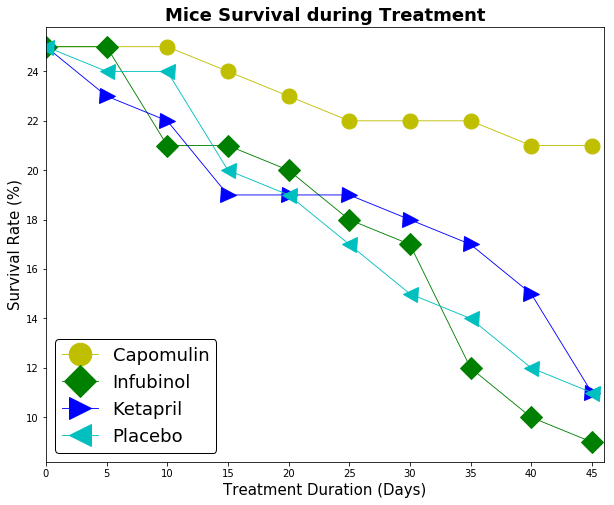

In [29]:
# * Creating a scatter plot (accounting for percentages) that shows the number of mice still alive through the course of treatment (Survival Rate)

# Re:Repeat: Make the Plot nice
plt.figure(figsize = (10,8))
plt.title('Mice Survival during Treatment', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Treatment Duration (Days)', fontdict = {'fontsize': 15})
plt.ylabel('Survival Rate (%)', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0, trtt_pivot.index.max()+3 , 5)) 
plt.xlim(0, trtt_pivot.index.max() + 1) 


# Errorbar for 'Capomulin'
plt.errorbar(survival_pivot.index, survival_pivot['Capomulin'], 
             color='y', marker='o', markersize=15, linestyle='-', linewidth=0.88)

# Errorbar for 'Infubinol'
plt.errorbar(survival_pivot.index, survival_pivot['Infubinol'], 
             color='g', marker='D', markersize=15, linestyle='-', linewidth=0.88)

# Errorbar for 'Ketapril'
plt.errorbar(survival_pivot.index, survival_pivot['Ketapril'], 
             color='b', marker='>', markersize=15, linestyle='-', linewidth=0.88)

# Errorbar for 'Placebo'
plt.errorbar(survival_pivot.index, survival_pivot['Placebo'], 
             color='c', marker='<', markersize=15, linestyle='-', linewidth=0.88)


# Re:Repeat: Plot the Legend and make it nice
survleg = plt.legend(numpoints = 1, 
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'k', 
                fontsize = '18', 
                framealpha = 1)

# Check out the survivors
plt.show()

## Summary Bar Graph

In [17]:
#`````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````#
# Summary Bar Graph                                                                                                           #                                                                                      #
#`````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````#
# * Create a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
# * Your bar graph should indicate tumor growth as red and tumor reduction as green.
# * It should also include a label with the percentage change for each bar. 

# Store all Relevant Percent Changes into a Tuple
# First, get the % of Tumor Volume Change
tvc_perc = ((trtt_pivot.iloc[-1]-trtt_pivot.iloc[0])/trtt_pivot.iloc[0]) * 100

# Check it out
tvc_perc     

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

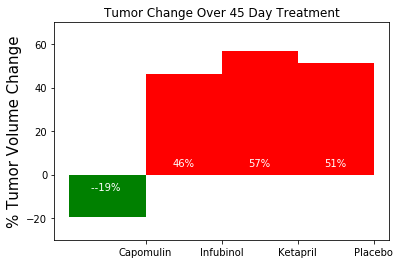

In [18]:
# Bar Chart Time!

# Store all Relevant Percent Changes into a Tuple
pct_changes = (tvc_perc ["Capomulin"], 
               tvc_perc ["Infubinol"], 
               tvc_perc ["Ketapril"], 
               tvc_perc ["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')

# Make the bar plot nice
ax.set_title('Total % Tumor Vol. Change by Drug (45 Days)', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
ax.set_ylabel('% Tumor Volume Change', fontdict = {'fontsize': 15})
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])


# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the labels
autolabelPass(rectsPass)
autolabelFail(rectsFail)


# Show the Figure
fig.show()
